## Tokenization

In [1]:
from tensorflow.keras.preprocessing.text import Tokenizer

sentences = [
    'i love my dog',
    'I, love my cat',
    'You love my dog!',
    'Do you think my dog is amazing?'
]
tokenizer = Tokenizer(num_words=100)
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
print(word_index)


{'my': 1, 'love': 2, 'dog': 3, 'i': 4, 'you': 5, 'cat': 6, 'do': 7, 'think': 8, 'is': 9, 'amazing': 10}


## Sequencing and Padding

In [2]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
sequences = tokenizer.texts_to_sequences(sentences)
padded = pad_sequences(sequences,maxlen = 5)
print(sequences)
print(padded)

[[4, 2, 1, 3], [4, 2, 1, 6], [5, 2, 1, 3], [7, 5, 8, 1, 3, 9, 10]]
[[ 0  4  2  1  3]
 [ 0  4  2  1  6]
 [ 0  5  2  1  3]
 [ 8  1  3  9 10]]


In [3]:
test_data = [
    'i really love my dog',
    'my dog loves my manatee'
]

test_seq = tokenizer.texts_to_sequences(test_data)
print("\nTest Sequence = ", test_seq)

padded = pad_sequences(test_seq, maxlen=10)
print("\nPadded Test Sequence: ")
print(padded)


Test Sequence =  [[4, 2, 1, 3], [1, 3, 1]]

Padded Test Sequence: 
[[0 0 0 0 0 0 4 2 1 3]
 [0 0 0 0 0 0 0 1 3 1]]


## Sarcasm Detection

In [4]:
import json
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [5]:
vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000

In [6]:
with open("sarcasm.json", 'r') as f:
    datastore = json.load(f)

sentences = []
labels = []

for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

In [7]:
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [8]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [9]:
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [11]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           160000    
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 24)                408       
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [12]:
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
625/625 - 6s - loss: 0.6780 - accuracy: 0.5604 - val_loss: 0.6412 - val_accuracy: 0.6049 - 6s/epoch - 10ms/step
Epoch 2/30
625/625 - 5s - loss: 0.4889 - accuracy: 0.7984 - val_loss: 0.4099 - val_accuracy: 0.8243 - 5s/epoch - 8ms/step
Epoch 3/30
625/625 - 5s - loss: 0.3325 - accuracy: 0.8676 - val_loss: 0.3598 - val_accuracy: 0.8480 - 5s/epoch - 7ms/step
Epoch 4/30
625/625 - 5s - loss: 0.2768 - accuracy: 0.8923 - val_loss: 0.3447 - val_accuracy: 0.8554 - 5s/epoch - 8ms/step
Epoch 5/30
625/625 - 5s - loss: 0.2397 - accuracy: 0.9071 - val_loss: 0.3438 - val_accuracy: 0.8521 - 5s/epoch - 7ms/step
Epoch 6/30
625/625 - 5s - loss: 0.2123 - accuracy: 0.9209 - val_loss: 0.3512 - val_accuracy: 0.8532 - 5s/epoch - 8ms/step
Epoch 7/30
625/625 - 5s - loss: 0.1901 - accuracy: 0.9293 - val_loss: 0.3488 - val_accuracy: 0.8550 - 5s/epoch - 8ms/step
Epoch 8/30
625/625 - 5s - loss: 0.1711 - accuracy: 0.9362 - val_loss: 0.3592 - val_accuracy: 0.8560 - 5s/epoch - 8ms/step
Epoch 9/30
625/625 - 6s

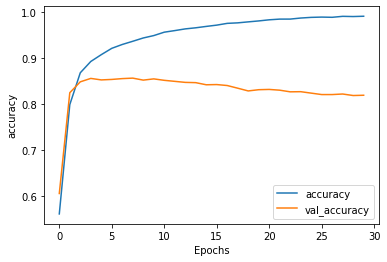

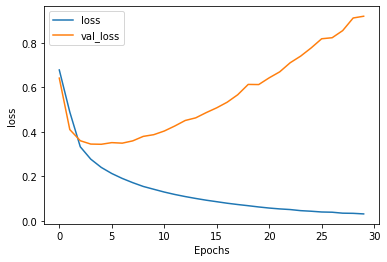

In [13]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [14]:
sentence = ["granny starting to fear spiders in the garden might be real", "game of thrones season finale showing this sunday night"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))

[[9.8007560e-01]
 [1.8686395e-04]]


In [2]:
import tensorflow as tf 

if tf.test.gpu_device_name(): 

    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))

else:

   print("Please install GPU version of TF")

Default GPU Device:/device:GPU:0


In [3]:

# Create some tensors
a = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
b = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])
c = tf.matmul(a, b)

print(c)


Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op MatMul in device /job:localhost/replica:0/task:0/device:GPU:0
tf.Tensor(
[[22. 28.]
 [49. 64.]], shape=(2, 2), dtype=float32)
